In [1]:
import time

import ray
from ray import tune
from ray.tune.schedulers import AsyncHyperBandScheduler
from ray.tune.suggest.hyperopt import HyperOptSearch
from hyperopt import hp

In [2]:
def evaluation_fn(step, width, height):
    return (0.1 + width * step / 100)**(-1) + height * 0.1


def easy_objective(config):
    # Hyperparameters
    width, height = config["width"], config["height"]

    for step in range(config["steps"]):
        # Iterative training function - can be any arbitrary training procedure
        intermediate_score = evaluation_fn(step, width, height)
        # Feed the score back back to Tune.
        tune.report(iterations=step, mean_loss=intermediate_score)
        #time.sleep(0.1)

In [3]:
ray.init(configure_logging=False)

{'node_ip_address': '172.17.0.2',
 'raylet_ip_address': '172.17.0.2',
 'redis_address': '172.17.0.2:6379',
 'object_store_address': '/tmp/ray/session_2020-09-07_16-12-22_428985_18246/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-09-07_16-12-22_428985_18246/sockets/raylet',
 'webui_url': 'localhost:8265',
 'session_dir': '/tmp/ray/session_2020-09-07_16-12-22_428985_18246'}

In [6]:
space = {
    "width": hp.uniform("width", 0, 20),
    "height": hp.uniform("height", -100, 100),
    # This is an ignored parameter.
    "activation": hp.choice("activation", ["relu", "tanh"])
}

config = {
    "num_samples": 10,
    "config": {
        "steps": 100,
    }
}
algo = HyperOptSearch(
    space,
    metric="mean_loss",
    mode="min")
scheduler = AsyncHyperBandScheduler(metric="mean_loss", mode="min")

In [7]:
result = tune.run(easy_objective, search_alg=algo, scheduler=scheduler, **config)

Tune detects GPUs, but no trials are using GPUs. To enable trials to use GPUs, set tune.run(resources_per_trial={'gpu': 1}...) which allows Tune to expose 1 GPU to each trial. You can also override `Trainable.default_resource_request` if using the Trainable API.
Log sync requires rsync to be installed.


Trial name,status,loc,activation,height,width
easy_objective_178b490c,RUNNING,,relu,-31.2225,1.2243
easy_objective_178c2c3c,PENDING,,relu,-73.0661,9.07515
easy_objective_178cc804,PENDING,,tanh,-89.6627,15.5659
easy_objective_178d50bc,PENDING,,relu,79.0504,8.72339
easy_objective_178dcd44,PENDING,,tanh,8.23278,10.2218
easy_objective_178e51b0,PENDING,,tanh,11.8652,12.7052
easy_objective_178ee274,PENDING,,tanh,-73.3325,16.9629
easy_objective_178f52a4,PENDING,,tanh,48.9252,12.4174
easy_objective_178fbe88,PENDING,,tanh,-92.4134,0.434294
easy_objective_17902698,PENDING,,tanh,-82.3858,8.72084


Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.
(pid=18391) 2020-09-07 16:13:40,286	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
(pid=18388) 2020-09-07 16:13:40,330	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
Log sync requires rsync to be installed.
(pid=18389) 2020-09-07 16:13:40,380	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(

Result for easy_objective_178b490c:
  date: 2020-09-07_16-13-40
  done: false
  experiment_id: e9fee3ce30ea4a71bfacdc1f13818e45
  experiment_tag: 1_activation=relu,height=-31.223,steps=100,width=1.2243
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 6.877748993067804
  neg_mean_loss: -6.877748993067804
  node_ip: 172.17.0.2
  pid: 18391
  time_since_restore: 0.0003974437713623047
  time_this_iter_s: 0.0003974437713623047
  time_total_s: 0.0003974437713623047
  timestamp: 1599495220
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 178b490c
  
Result for easy_objective_178cc804:
  date: 2020-09-07_16-13-40
  done: false
  experiment_id: ed5725e7374543578423f02ced4667cf
  experiment_tag: 3_activation=tanh,height=-89.663,steps=100,width=15.566
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 1.033726535550894
  neg_mean_loss: -1.033726535550894
  node_ip: 172.17.0.2
  pid: 18388
  time_since_restore: 0.0

Log sync requires rsync to be installed.
(pid=19438) 2020-09-07 16:13:41,205	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
Log sync requires rsync to be installed.
Log sync requires rsync to be installed.


Result for easy_objective_178dcd44:
  date: 2020-09-07_16-13-41
  done: true
  experiment_id: f34c2c6e7a4e48ae93d687c29730535f
  experiment_tag: 5_activation=tanh,height=8.2328,steps=100,width=10.222
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 10.82327804219093
  neg_mean_loss: -10.82327804219093
  node_ip: 172.17.0.2
  pid: 19438
  time_since_restore: 0.007350921630859375
  time_this_iter_s: 0.007350921630859375
  time_total_s: 0.007350921630859375
  timestamp: 1599495221
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 178dcd44
  
Result for easy_objective_178cc804:
  date: 2020-09-07_16-13-41
  done: true
  experiment_id: ed5725e7374543578423f02ced4667cf
  experiment_tag: 3_activation=tanh,height=-89.663,steps=100,width=15.566
  hostname: ab778119f77d
  iterations: 99
  iterations_since_restore: 100
  mean_loss: -8.901799837477851
  neg_mean_loss: 8.901799837477851
  node_ip: 172.17.0.2
  pid: 18388
  time_since_restore: 0.9241

Log sync requires rsync to be installed.


Result for easy_objective_178e51b0:
  date: 2020-09-07_16-13-41
  done: true
  experiment_id: 7562caf7e76944e98334fa771d1ab2c9
  experiment_tag: 6_activation=tanh,height=11.865,steps=100,width=12.705
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 11.186517382628578
  neg_mean_loss: -11.186517382628578
  node_ip: 172.17.0.2
  pid: 19443
  time_since_restore: 0.017580032348632812
  time_this_iter_s: 0.017580032348632812
  time_total_s: 0.017580032348632812
  timestamp: 1599495221
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 178e51b0
  
Result for easy_objective_178ee274:
  date: 2020-09-07_16-13-41
  done: false
  experiment_id: 07ee2baaa344438fa5a11c9fec7cf9ad
  experiment_tag: 7_activation=tanh,height=-73.333,steps=100,width=16.963
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 2.666748079598997
  neg_mean_loss: -2.666748079598997
  node_ip: 172.17.0.2
  pid: 19445
  time_since_restore: 0.0089

(pid=19443) 2020-09-07 16:13:41,484	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.
(pid=19445) 2020-09-07 16:13:41,686	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Result for easy_objective_178f52a4:
  date: 2020-09-07_16-13-41
  done: true
  experiment_id: 0d6af667b74640928b9a1316b6950a94
  experiment_tag: 8_activation=tanh,height=48.925,steps=100,width=12.417
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 14.892523161568798
  neg_mean_loss: -14.892523161568798
  node_ip: 172.17.0.2
  pid: 19442
  time_since_restore: 0.008889913558959961
  time_this_iter_s: 0.008889913558959961
  time_total_s: 0.008889913558959961
  timestamp: 1599495221
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 178f52a4
  


(pid=19442) 2020-09-07 16:13:41,770	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Result for easy_objective_178fbe88:
  date: 2020-09-07_16-13-42
  done: false
  experiment_id: ecefc7d323254690a1a1990d7fbed39a
  experiment_tag: 9_activation=tanh,height=-92.413,steps=100,width=0.43429
  hostname: ab778119f77d
  iterations: 0
  iterations_since_restore: 1
  mean_loss: 0.7586640574138421
  neg_mean_loss: -0.7586640574138421
  node_ip: 172.17.0.2
  pid: 19478
  time_since_restore: 0.0004978179931640625
  time_this_iter_s: 0.0004978179931640625
  time_total_s: 0.0004978179931640625
  timestamp: 1599495222
  timesteps_since_restore: 0
  training_iteration: 1
  trial_id: 178fbe88
  
Result for easy_objective_178fbe88:
  date: 2020-09-07_16-13-42
  done: true
  experiment_id: ecefc7d323254690a1a1990d7fbed39a
  experiment_tag: 9_activation=tanh,height=-92.413,steps=100,width=0.43429
  hostname: ab778119f77d
  iterations: 3
  iterations_since_restore: 4
  mean_loss: -0.3940340798995514
  neg_mean_loss: 0.3940340798995514
  node_ip: 172.17.0.2
  pid: 19478
  time_since_restore

(pid=19478) 2020-09-07 16:13:42,184	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


Trial name,status,loc,activation,height,width,loss,iter,total time (s)
easy_objective_178b490c,TERMINATED,,relu,-31.2225,1.2243,-1.97455,64,0.995628
easy_objective_178c2c3c,TERMINATED,,relu,-73.0661,9.07515,2.69339,1,0.000365019
easy_objective_178cc804,TERMINATED,,tanh,-89.6627,15.5659,-8.9018,100,0.924163
easy_objective_178d50bc,TERMINATED,,relu,79.0504,8.72339,17.905,1,0.00282717
easy_objective_178dcd44,TERMINATED,,tanh,8.23278,10.2218,10.8233,1,0.00735092
easy_objective_178e51b0,TERMINATED,,tanh,11.8652,12.7052,11.1865,1,0.01758
easy_objective_178ee274,TERMINATED,,tanh,-73.3325,16.9629,-7.27406,100,0.627339
easy_objective_178f52a4,TERMINATED,,tanh,48.9252,12.4174,14.8925,1,0.00888991
easy_objective_178fbe88,TERMINATED,,tanh,-92.4134,0.434294,-0.394034,4,0.0262952
easy_objective_17902698,TERMINATED,,tanh,-82.3858,8.72084,-5.47328,4,0.0149531


(pid=19543) 2020-09-07 16:13:42,381	WARNING function_runner.py:503 -- Function checkpointing is disabled. This may result in unexpected behavior when using checkpointing features or certain schedulers. To enable, set the train function arguments to be `func(config, checkpoint_dir=None)`.


In [8]:
print (result.get_best_config(metric="mean_loss"))

{'steps': 100, 'activation': 'relu', 'height': 79.05041787826016, 'width': 8.723391162614263}


In [9]:
df = result.dataframe()

AxesSubplot(0.125,0.125;0.775x0.755)


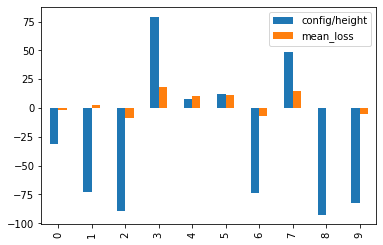

In [26]:
print(df[['config/height','mean_loss']].plot(kind='bar'))